In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('coffee_dataset.csv')
df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [2]:
coffeedrinkers = df[df.drinks_coffee==True]
noncoffeedrinkers = df[df.drinks_coffee==False]
coffeedrinkersheight = coffeedrinkers.height.mean()
noncoffeedrinkersheight = noncoffeedrinkers.height.mean()
coffeedrinkersheight,noncoffeedrinkersheight

(68.40021025548401, 66.44340776214705)

# Alternative Hypothesis the average height of coffee drinkers - average height of non-coffee drinkers > 0
## Null Hypothesis the average height of coffee drinkers - average height of non-coffee drinkers <= 0

In [3]:
obs_diff = coffeedrinkersheight - noncoffeedrinkersheight
obs_diff

1.9568024933369657

## Getting samples, adding the difference of both group's means to list

(array([  2.,  11., 104., 261., 465., 568., 372., 169.,  37.,  11.]),
 array([1.52287224, 1.604966  , 1.68705977, 1.76915353, 1.8512473 ,
        1.93334107, 2.01543483, 2.0975286 , 2.17962237, 2.26171613,
        2.3438099 ]),
 <a list of 10 Patch objects>)

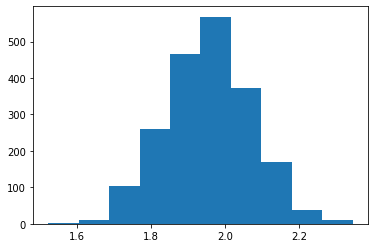

In [4]:
diff = []
for _ in range(2000):
    sample = df.sample(df.shape[0], replace = True)
    averagecoffeedrinkers = sample[sample.drinks_coffee==True].height.mean()
    averagenoncoffeedrinkers = sample[sample.drinks_coffee==False].height.mean()
    diff.append(averagecoffeedrinkers - averagenoncoffeedrinkers)
plt.hist(diff)

## After gathering null population, setting its mean to 0 to represent our null hypothesis
## Then Adding the observed difference to see its p value and to either reject/accept the hypothesis


(array([  3.,  36., 149., 388., 597., 491., 234.,  80.,  20.,   2.]),
 array([-0.40246219, -0.31747831, -0.23249443, -0.14751055, -0.06252667,
         0.02245721,  0.10744109,  0.19242497,  0.27740885,  0.36239274,
         0.44737662]),
 <a list of 10 Patch objects>)

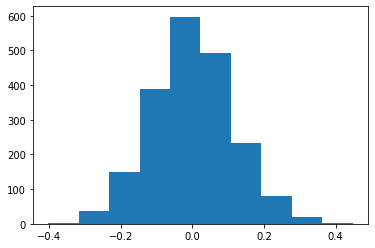

In [5]:
null = np.array(diff)
null = np.random.normal(0, null.std(), null.size)
plt.hist(null)


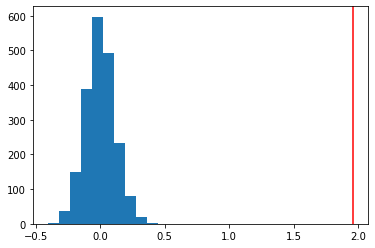

In [6]:
plt.hist(null)
plt.axvline(x=obs_diff, c='red')

# P value smaller than 5%, Alternative hypothesis Accepted

In [7]:
(null>obs_diff).mean()

0.0